<center> 
    <a href="https://www.visual-layer.com" target="_blank" rel="noopener noreferrer">
    <picture>
    <source media="(prefers-color-scheme: dark)" srcset="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo_dark_mode.png" width=200>
    <source media="(prefers-color-scheme: light)" srcset="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png" width=200>
    <img alt="vl logo." src="https://raw.githubusercontent.com/visual-layer/fastdup/main/gallery/visual_layer_logo.png" width=400>
    </picture>
    </a><br>
    <a href="https://github.com/visual-layer/fastdup" target="_blank" style="text-decoration: none;"> GitHub </a> •
    <a href="https://discord.com/invite/Dqw458EG/" target="_blank" style="text-decoration: none;"> Join Discord Community </a> •
    <a href="https://visual-layer.readme.io/discuss" target="_blank" style="text-decoration: none;"> Discussion Forum </a>
</center>

<center> 
    <a href="https://medium.com/visual-layer" target="_blank" style="text-decoration: none;"> Blog </a> •
    <a href="https://visual-layer.readme.io/" target="_blank" style="text-decoration: none;"> Documentation </a> •
    <a href="https://visual-layer.com/about" target="_blank" style="text-decoration: none;"> About Us </a> 
</center>


<br>

<center> 
<div style="text-align: center; margin-top:50px;">
    <a href="https://visual-layer.com/" style="padding:10px;">
                <img alt="site" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/web.png" width="50"></a>
    <a href="https://medium.com/visual-layer" style="padding:10px;">
                <img alt="blog" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/forum.png" width="50"></a>
    <a href="https://github.com/visual-layer/fastdup" style="padding:10px;">
                <img alt="github" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/github.png" width="50"></a>
    <a href="https://discord.com/invite/Dqw458EG/" style="padding:10px;">
                <img alt="slack" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/discord.png" width="50"></a>
    <a href="https://www.linkedin.com/company/visual-layer/" style="padding:10px;">
                <img alt="linkedin" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/linkedin.png" width="50"></a>
    <a href="https://www.youtube.com/@visual-layer" style="padding:10px;">
                <img alt="youtube" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/youtube.png" width="50"></a>
    <a href="https://twitter.com/visual_layer" style="padding:10px;">
                <img alt="twitter" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/x.png" width="50"></a>
</div>
</center>

# Finding and Removing Mislabels

[![Open in Colab](https://img.shields.io/badge/Open%20in%20Colab-blue?style=for-the-badge&logo=google-colab&labelColor=gray)](https://colab.research.google.com/github/visual-layer/fastdup/blob/main/examples/finding-removing-mislabels.ipynb)
[![Open in Kaggle](https://img.shields.io/badge/Open%20in%20Kaggle-blue?style=for-the-badge&logo=kaggle&labelColor=gray)](https://kaggle.com/kernels/welcome?src=https://github.com/visual-layer/fastdup/blob/main/examples/finding-removing-mislabels.ipynb)
[![Explore the Docs](https://img.shields.io/badge/Explore%20the%20Docs-blue?style=for-the-badge&labelColor=gray&logo=read-the-docs)](https://visual-layer.readme.io/docs/finding-removing-mislabels)

This notebook shows how to quickly analyze an image dataset for potential image mislabels and export the list of mislabeled images for further inspection.

## Installation
First, let's start with the installation:

> ✅ **Tip** - If you're new to fastdup, we encourage you to run the notebook in [Google Colab](https://colab.research.google.com/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb) or [Kaggle](https://kaggle.com/kernels/welcome?src=https://github.com/visual-layer/fastdup/blob/main/quick-dataset-analysis.ipynb) for the best experience. If you'd like to just view and skim through the notebook, we recommend viewing using [nbviewer](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb).  



In [ ]:
import sys
if "google.colab" in sys.modules:
    # Running in Google Colab
    !pip install --force-reinstall --no-cache-dir numpy==1.26.4 scipy fastdup
else:
    # Running outside Colab
    !pip install -Uq fastdup


Now, test the installation by printing out the version. If there's no error message, we are ready to go!

In [1]:
import fastdup
fastdup.__version__

'2.0.21'

## Download Dataset


In this notebook let's use a widely available and relatively well curated [Food-101](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/) dataset.

The Food-101 dataset consists of 101 food classes with 1,000 images per class. That is a total of 101,000 images.

Let's download only from the dataset and extract them into our local directory:

> 🗒 **Note** - fastdup works on both unlabeled and labeled images. But for now, we are only interested in finding issues in the images and not the annotations. 
> If you're interested in finding annotation issues, head to:
> + 🖼 [**Analyze Image Classification Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-image-classification-dataset.ipynb)
> + 🎁 [**Analyze Object Detection Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-object-detection-dataset.ipynb).


Let's download only from the dataset and extract them into the local directory:

In [ ]:
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
!tar -xf food-101.tar.gz

## Create Annotations DataFrame

food-101 dataset has a specific structure where the images are stored in folders named after the class name. Let's create a DataFrame with the annotations.

In [2]:
import os
import pandas as pd

dataset_dir = 'food-101/images/'

filenames = []
labels = []

# Iterate over the directory and subdirectories
for root, dirs, files in os.walk(dataset_dir):
    # Skip the root directory
    if root == dataset_dir:
        continue

    label = os.path.basename(root)

    for filename in files:
        filenames.append(os.path.join(root, filename))
        labels.append(label)

data = {'filename': filenames, 'label': labels}
df = pd.DataFrame(data)

df

,filename,label
0,food-101/images/gnocchi/1642469.jpg,gnocchi
1,food-101/images/gnocchi/1598303.jpg,gnocchi
2,food-101/images/gnocchi/79585.jpg,gnocchi
3,food-101/images/gnocchi/2397771.jpg,gnocchi
4,food-101/images/gnocchi/2388954.jpg,gnocchi
...,...,...
100995,food-101/images/bread_pudding/2415610.jpg,bread_pudding
100996,food-101/images/bread_pudding/723067.jpg,bread_pudding
100997,food-101/images/bread_pudding/1051348.jpg,bread_pudding
100998,food-101/images/bread_pudding/3607583.jpg,bread_pudding


## Run fastdup

Once the extraction completes, we can run fastdup on the images.

For that let's initialize fastdup and specify the input directory which points to the folder of images.

> 🗒 **Note** - The `.create` method also has an optional `work_dir` parameter which specifies the directory to store artifacts from the run.

In other words you can run `fastdup.create(input_dir="images/", work_dir="my_work_dir/")` if you'd like to store the artifacts in a `my_work_dir`.

Now, let's run fastdup.

In [ ]:
fd = fastdup.create(input_dir="food-101/images/")
fd.run(annotations=df)

In [44]:
outliers_df = fd.outliers()

In [45]:
outliers_df

,outlier,nearest,distance,filename_outlier,label_outlier,index_x,error_code_outlier,is_valid_outlier,fd_index_outlier,filename_nearest,label_nearest,index_y,error_code_nearest,is_valid_nearest,fd_index_nearest
0,75368,13490,0.379365,food-101/images/breakfast_burrito/462294.jpg,breakfast_burrito,75368,VALID,True,75368,food-101/images/tacos/1505262.jpg,tacos,13490,VALID,True,13490
1,41508,16764,0.429240,food-101/images/macarons/2117640.jpg,macarons,41508,VALID,True,41508,food-101/images/fish_and_chips/2079080.jpg,fish_and_chips,16764,VALID,True,16764
2,13490,19357,0.515785,food-101/images/tacos/1505262.jpg,tacos,13490,VALID,True,13490,food-101/images/red_velvet_cake/3143813.jpg,red_velvet_cake,19357,VALID,True,19357
3,3049,98686,0.528563,food-101/images/shrimp_and_grits/1047420.jpg,shrimp_and_grits,3049,VALID,True,3049,food-101/images/club_sandwich/2465517.jpg,club_sandwich,98686,VALID,True,98686
4,30949,65310,0.547157,food-101/images/sushi/3100962.jpg,sushi,30949,VALID,True,30949,food-101/images/deviled_eggs/3145324.jpg,deviled_eggs,65310,VALID,True,65310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6045,40611,40758,0.772242,food-101/images/chocolate_cake/2533462.jpg,chocolate_cake,40611,VALID,True,40611,food-101/images/chocolate_cake/652245.jpg,chocolate_cake,40758,VALID,True,40758
6046,22826,66582,0.772263,food-101/images/dumplings/1325469.jpg,dumplings,22826,VALID,True,22826,food-101/images/escargots/1488896.jpg,escargots,66582,VALID,True,66582
6047,96748,96668,0.772266,food-101/images/steak/513129.jpg,steak,96748,VALID,True,96748,food-101/images/steak/3113772.jpg,steak,96668,VALID,True,96668
6048,61641,78643,0.772278,food-101/images/chocolate_mousse/1463326.jpg,chocolate_mousse,61641,VALID,True,61641,food-101/images/tiramisu/849295.jpg,tiramisu,78643,VALID,True,78643


In [46]:
outliers_df = outliers_df[['filename_outlier', 'filename_nearest', 'distance', 'label_outlier', 'label_nearest']]
outliers_df

,filename_outlier,filename_nearest,distance,label_outlier,label_nearest
0,food-101/images/breakfast_burrito/462294.jpg,food-101/images/tacos/1505262.jpg,0.379365,breakfast_burrito,tacos
1,food-101/images/macarons/2117640.jpg,food-101/images/fish_and_chips/2079080.jpg,0.429240,macarons,fish_and_chips
2,food-101/images/tacos/1505262.jpg,food-101/images/red_velvet_cake/3143813.jpg,0.515785,tacos,red_velvet_cake
3,food-101/images/shrimp_and_grits/1047420.jpg,food-101/images/club_sandwich/2465517.jpg,0.528563,shrimp_and_grits,club_sandwich
4,food-101/images/sushi/3100962.jpg,food-101/images/deviled_eggs/3145324.jpg,0.547157,sushi,deviled_eggs
...,...,...,...,...,...
6045,food-101/images/chocolate_cake/2533462.jpg,food-101/images/chocolate_cake/652245.jpg,0.772242,chocolate_cake,chocolate_cake
6046,food-101/images/dumplings/1325469.jpg,food-101/images/escargots/1488896.jpg,0.772263,dumplings,escargots
6047,food-101/images/steak/513129.jpg,food-101/images/steak/3113772.jpg,0.772266,steak,steak
6048,food-101/images/chocolate_mousse/1463326.jpg,food-101/images/tiramisu/849295.jpg,0.772278,chocolate_mousse,tiramisu


Let's select the top 30 outliers and display them.

In [47]:
outliers_df = outliers_df.head(30)

/tmp/ipykernel_54998/3709838206.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['filename_outlier_preview'] = outliers_df['filename_outlier'].apply(lambda x: display_image(x, width=100))
/tmp/ipykernel_54998/3709838206.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['filename_nearest_preview'] = outliers_df['filename_nearest'].apply(lambda x: display_image(x, width=100))


,filename_outlier,filename_nearest,distance,label_outlier,label_nearest,filename_outlier_preview,filename_nearest_preview
0,food-101/images/breakfast_burrito/462294.jpg,food-101/images/tacos/1505262.jpg,0.379365,breakfast_burrito,tacos,,
1,food-101/images/macarons/2117640.jpg,food-101/images/fish_and_chips/2079080.jpg,0.429240,macarons,fish_and_chips,,
2,food-101/images/tacos/1505262.jpg,food-101/images/red_velvet_cake/3143813.jpg,0.515785,tacos,red_velvet_cake,,
3,food-101/images/shrimp_and_grits/1047420.jpg,food-101/images/club_sandwich/2465517.jpg,0.528563,shrimp_and_grits,club_sandwich,,
4,food-101/images/sushi/3100962.jpg,food-101/images/deviled_eggs/3145324.jpg,0.547157,sushi,deviled_eggs,,
5,food-101/images/pho/2399877.jpg,food-101/images/hot_dog/1823010.jpg,0.573438,pho,hot_dog,,
6,food-101/images/pho/1840846.jpg,food-101/images/chocolate_mousse/456162.jpg,0.574433,pho,chocolate_mousse,,
7,food-101/images/chocolate_cake/2518457.jpg,food-101/images/paella/3838854.jpg,0.576987,chocolate_cake,paella,,
8,food-101/images/tacos/1091159.jpg,food-101/images/ice_cream/618711.jpg,0.583393,tacos,ice_cream,,
9,food-101/images/red_velvet_cake/2894652.jpg,food-101/images/red_velvet_cake/2750594.jpg,0.589379,red_velvet_cake,red_velvet_cake,,

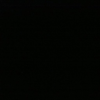
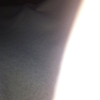
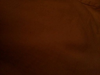
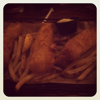
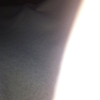
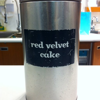
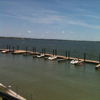
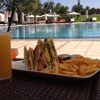
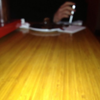
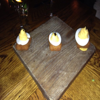
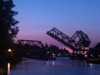
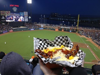
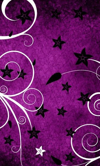
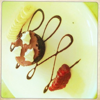
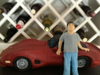
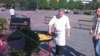
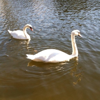
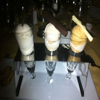
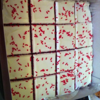
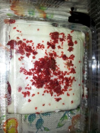
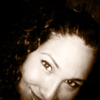
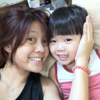
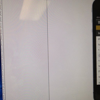
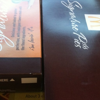
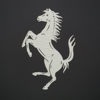
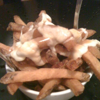
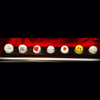
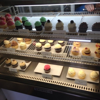
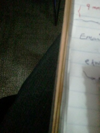
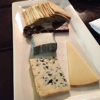
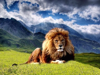
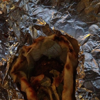
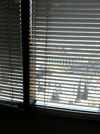
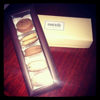
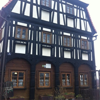
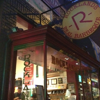
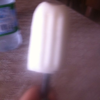
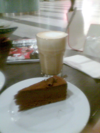
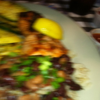
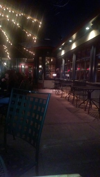
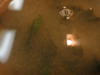
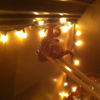
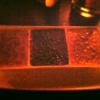
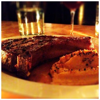
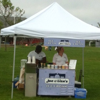
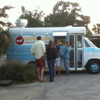
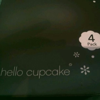
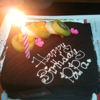
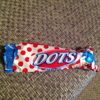
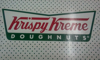
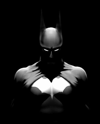
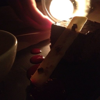
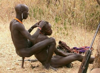
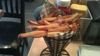
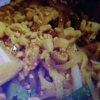
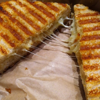
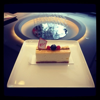
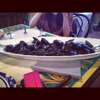
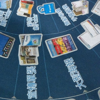
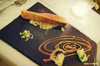

In [48]:
import base64
from io import BytesIO
from PIL import Image

def resize_and_encode_image(image_path, width=100):
    with Image.open(image_path) as img:
        wpercent = (width / float(img.size[0]))
        height = int((float(img.size[1]) * float(wpercent)))
        resized_img = img.resize((width, height))
        buffered = BytesIO()
        resized_img.save(buffered, format="PNG")
        encoded_string = base64.b64encode(buffered.getvalue()).decode('utf-8')
    return f'<img src="data:image/png;base64,{encoded_string}" width="{width}">'

def display_image(image_path, width=100):
    if isinstance(image_path, str):
        return resize_and_encode_image(image_path, width)
    else:
        return ''

outliers_df['filename_outlier_preview'] = outliers_df['filename_outlier'].apply(lambda x: display_image(x, width=100))
outliers_df['filename_nearest_preview'] = outliers_df['filename_nearest'].apply(lambda x: display_image(x, width=100))

display(outliers_df.style)

Now we can export the results to a CSV file for further analysis and correction of labels.

In [49]:
outliers_df.drop(columns=['filename_outlier_preview', 'filename_nearest_preview']).to_csv('outliers.csv', index=False)

## Interactive Exploration
In addition to the static visualizations presented above, fastdup also offers interactive exploration of the dataset.

To explore the dataset and issues interactively in a browser, run:

In [ ]:
fd.explore()

> 🗒 **Note** - This currently requires you to sign-up (for free) to view the interactive exploration. Alternatively, you can visualize fastdup in a non-interactive way using fastdup's built in galleries shown in the upcoming cells.

You'll be presented with a web interface that lets you conveniently view, filter, and curate your dataset in a web interface.


![image.png](https://vl-blog.s3.us-east-2.amazonaws.com/fastdup_assets/cloud_preview.gif)

## Wrap Up

That's a wrap! In this notebook, we showed how to get mislabels from a labeled dataset.


Next, feel free to check out other tutorials -

+ ⚡ [**Quickstart**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb): Learn how to install fastdup, load a dataset and analyze it for potential issues such as duplicates/near-duplicates, broken images, outliers, dark/bright/blurry images, and view visually similar image clusters. If you're new, start here!
+ 🧹 [**Clean Image Folder**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/cleaning-image-dataset.ipynb): Learn how to analyze and clean a folder of images from potential issues and export a list of problematic files for further action. If you have an unorganized folder of images, this is a good place to start.
+ 🖼 [**Analyze Image Classification Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-image-classification-dataset.ipynb): Learn how to load a labeled image classification dataset and analyze for potential issues. If you have labeled ImageNet-style folder structure, have a go!
+ 🎁 [**Analyze Object Detection Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-object-detection-dataset.ipynb): Learn how to load bounding box annotations for object detection and analyze for potential issues. If you have a COCO-style labeled object detection dataset, give this example a try. 

As usual, feedback is welcome! Questions? Drop by our [Slack channel](https://visualdatabase.slack.com/join/shared_invite/zt-19jaydbjn-lNDEDkgvSI1QwbTXSY6dlA#/shared-invite/email) or open an issue on [GitHub](https://github.com/visual-layer/fastdup/issues).


<center> 
<div style="text-align: center; margin-top:50px;">
    <a href="https://visual-layer.com/" style="padding:10px;">
                <img alt="site" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/web.png" width="50"></a>
    <a href="https://medium.com/visual-layer" style="padding:10px;">
                <img alt="blog" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/forum.png" width="50"></a>
    <a href="https://github.com/visual-layer/fastdup" style="padding:10px;">
                <img alt="github" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/github.png" width="50"></a>
    <a href="https://discord.com/invite/Dqw458EG/" style="padding:10px;">
                <img alt="slack" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/discord.png" width="50"></a>
    <a href="https://www.linkedin.com/company/visual-layer/" style="padding:10px;">
                <img alt="linkedin" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/linkedin.png" width="50"></a>
    <a href="https://www.youtube.com/@visual-layer" style="padding:10px;">
                <img alt="youtube" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/youtube.png" width="50"></a>
    <a href="https://twitter.com/visual_layer" style="padding:10px;">
                <img alt="twitter" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/x.png" width="50"></a>
</div>
<br>
<div style="text-align:center; font-family:'DM Sans',sans-serif; font-style:italic; font-size:12px; max-width:600px; margin: 20px auto auto;">
    <img style="width:200px" alt="logo" src="https://d2iycffepdu1yp.cloudfront.net/design-assets/VL_horizontal_logo.png" width=300>
    <div style="margin-top:20px;">Copyright © 2024 Visual Layer. All rights reserved.</div>
</div>

</center> 